## R labsession 6
Buriola Lorenzo - 2021860

In [1]:
#Function for sizing plots
fig <- function(width, heigth){
  options(repr.plot.width = width, repr.plot.height = heigth)
}

In [2]:
#Library for multidimensional integrals
library(cubature)

## Exercise 1

In [3]:
y <- c(4,1,3,1,3)
mu <- seq(0, 7, 0.001)

a) __Uniform prior__

Having a _likelihood_ which follows a __Poisson distribution__ and a _uniform prior_, the _posterior_ will be a $Gammma$ distribution with _shape_ $\alpha = \sum x_j + 1$ and $\lambda = n$ ; ($n$ = number of data) 

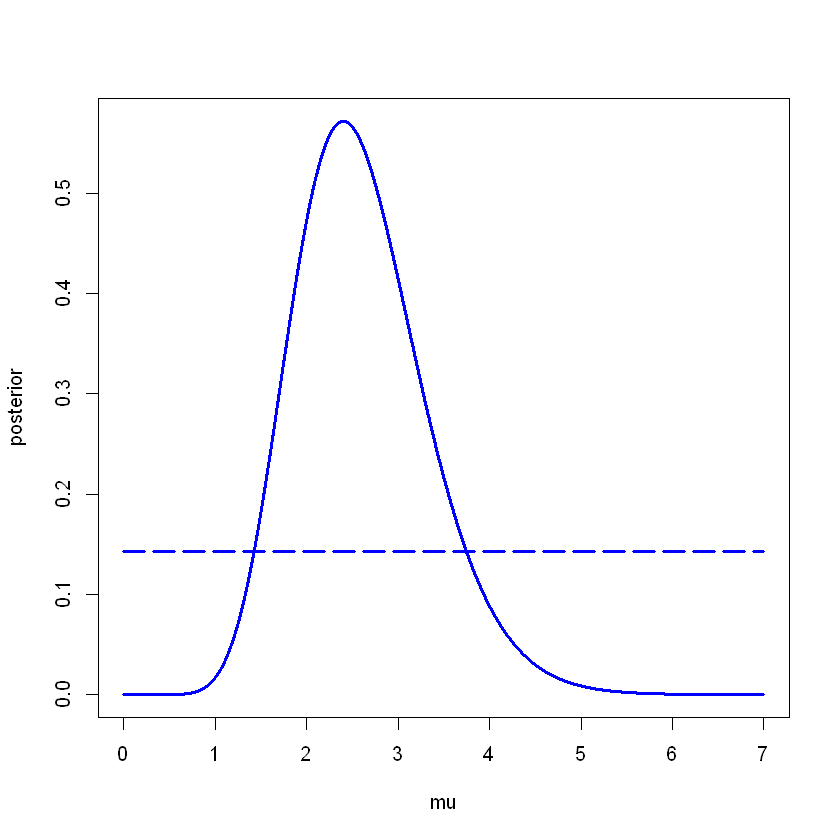

In [4]:
prior <- rep(1/max(mu), length(mu))
a1 <- sum(y) + 1
l1 <- length(y)
posterior <- dgamma(mu, shape = a1, rate = l1)
plot(mu, posterior, type = 'l', lwd = 3, col = 'blue')
lines(mu, prior, lwd = 3, col = 'blue', lty = 5)

In [5]:
m1 <- a1/l1
Ex <- function(x){
    x*dgamma(x, shape = a1, rate = l1)
}
m_N <-integrate(Ex, lower = 0, upper = 100)$value
cat('Mean:', m1, '; Numerical est:', m_N)

Mean: 2.6 ; Numerical est: 2.6

In [6]:
var1 <- a1/l1^2
Ex2 <- function(x){
    x^2*dgamma(x, shape = a1, rate = l1)
}
var_N <-integrate(Ex2, lower = 0, upper = 100)$value - m_N^2
cat('Variance:', var1, '; Numerical est:', var_N)

Variance: 0.52 ; Numerical est: 0.52

In [7]:
median <- qgamma(0.5, shape = a1, rate = l1)
cat('Median:', median)

Median: 2.533646

b) __Jeffrey's prior__

In this case the _posterior_ will be: $Gamma(\alpha, \lambda)$ with $\alpha = \sum x_j + \frac{1}{2}$ and $\lambda = n$.

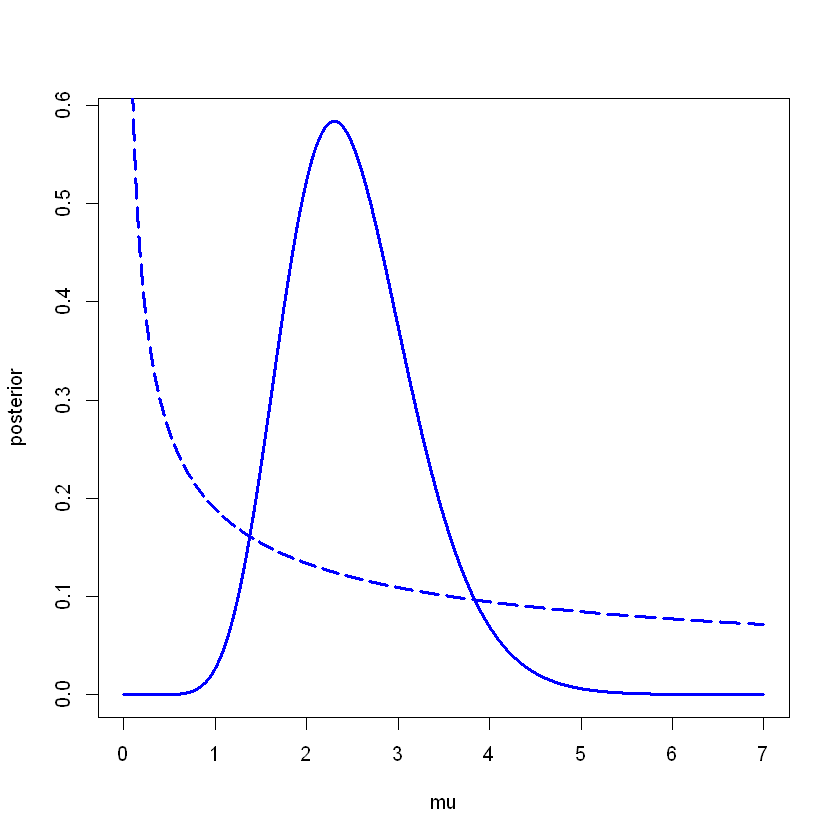

In [8]:
f <- function(x){
    1/sqrt(x)
}
prior <- 1/sqrt(mu)/integrate(f, lower = 0, upper = 7)$value
a2 <- sum(y) + 0.5
l2 <- length(y)
posterior <- dgamma(mu, shape = a2, rate = l2)
plot(mu, posterior, type = 'l', lwd = 3, col = 'blue')
lines(mu, prior, lwd = 3, col = 'blue', lty = 5)

In [9]:
m2 <- a2/l2
f <- function(x){
    x*dgamma(x, shape = a2, rate = l2)
}
m_N <-integrate(f, lower = 0, upper = 100)$value
cat('Mean:', m2, '; Numerical est:', m_N)

Mean: 2.5 ; Numerical est: 2.5

In [10]:
var2 <- a2/l2^2
f <- function(x){
    x^2*dgamma(x, shape = a2, rate = l2)
}
var_N <-integrate(f, lower = 0, upper = 100)$value - m_N^2
cat('Variance:', var2, '; Numerical est:', var_N)

Variance: 0.5 ; Numerical est: 0.5

In [11]:
median <- qgamma(0.5, shape = a2, rate = l2)
cat('Median:', median)

Median: 2.433659

c) __Credibility intervals__

1) Uniform prior

In [12]:
#1
ls <- qgamma(0.025, shape = a1, rate = l1)
ld <- qgamma(0.975, shape = a1, rate = l1)
cat('95% Gamma distribution credibility interval:\t', ls, '-', ld, '\n')

lsG <- qnorm(0.025, mean = m1, sd = sqrt(var1))
ldG <- qnorm(0.975, mean = m1, sd = sqrt(var1))
cat('95% Normal approx. credibility interval:\t', lsG, '-', ldG, '\n')

95% Gamma distribution credibility interval:	 1.38439 - 4.192317 
95% Normal approx. credibility interval:	 1.18665 - 4.01335 


2) Jeffrey's prior

In [13]:
#2
ls <- qgamma(0.025, shape = a2, rate = l2)
ld <- qgamma(0.975, shape = a2, rate = l2)
cat('95% Gamma distribution credibility interval:\t', ls, '-', ld, '\n')

lsG <- qnorm(0.025, mean = m2, sd = sqrt(var2))
ldG <- qnorm(0.975, mean = m2, sd = sqrt(var2))
cat('95% Normal approx. credibility interval:\t', lsG, '-', ldG, '\n')

95% Gamma distribution credibility interval:	 1.311972 - 4.064647 
95% Normal approx. credibility interval:	 1.114096 - 3.885904 


## Exercise 2

#### Data Generation

The likelihood of the model is a __Cauchy__ distribution, that comes out considering a uniform distribution for the angle of emission of light. Generating the data we will use random Cauchy distributed numbers. $A$ and $B$ will be our true values.

In [14]:
#Seed for reproducibility
set.seed(123)
A <- 2
B <- 10
data <- rcauchy(100, scale =  B, location = A)

#### Data Analysis

For simplicity the log likelihood is used. We assume a uniform prior for the two parameters (this means that $p(\alpha)$ is independent on $p(\beta)$).

In [15]:
loglike <- function(p, x){
    sum(log(p[2]/(p[2]^2+(x-p[1])^2)))
}


posterior <- function(p, x){
    exp(loglike(p, x))
}

a_min <- -10
a_max <- 10
b_min <- 5
b_max <- 25

a_list <- seq(a_min, a_max, length.out = 100)
b_list <- seq(b_min, b_max, length.out = 100)
p_list <- expand.grid(a_list, b_list)

prior_a <- rep(1/(a_max-a_min), length(a_list))
prior_b <- rep(1/(b_max-b_min), length(b_list))

In the next cell the _posterior_ is computed considering a progressively increasing number of data. The posterioir is normalize using the function _adaptIntegrate_. Finally some plots are produced. These are contour plots that show the development of the _posterior_ $PDF(\alpha,\beta)$.

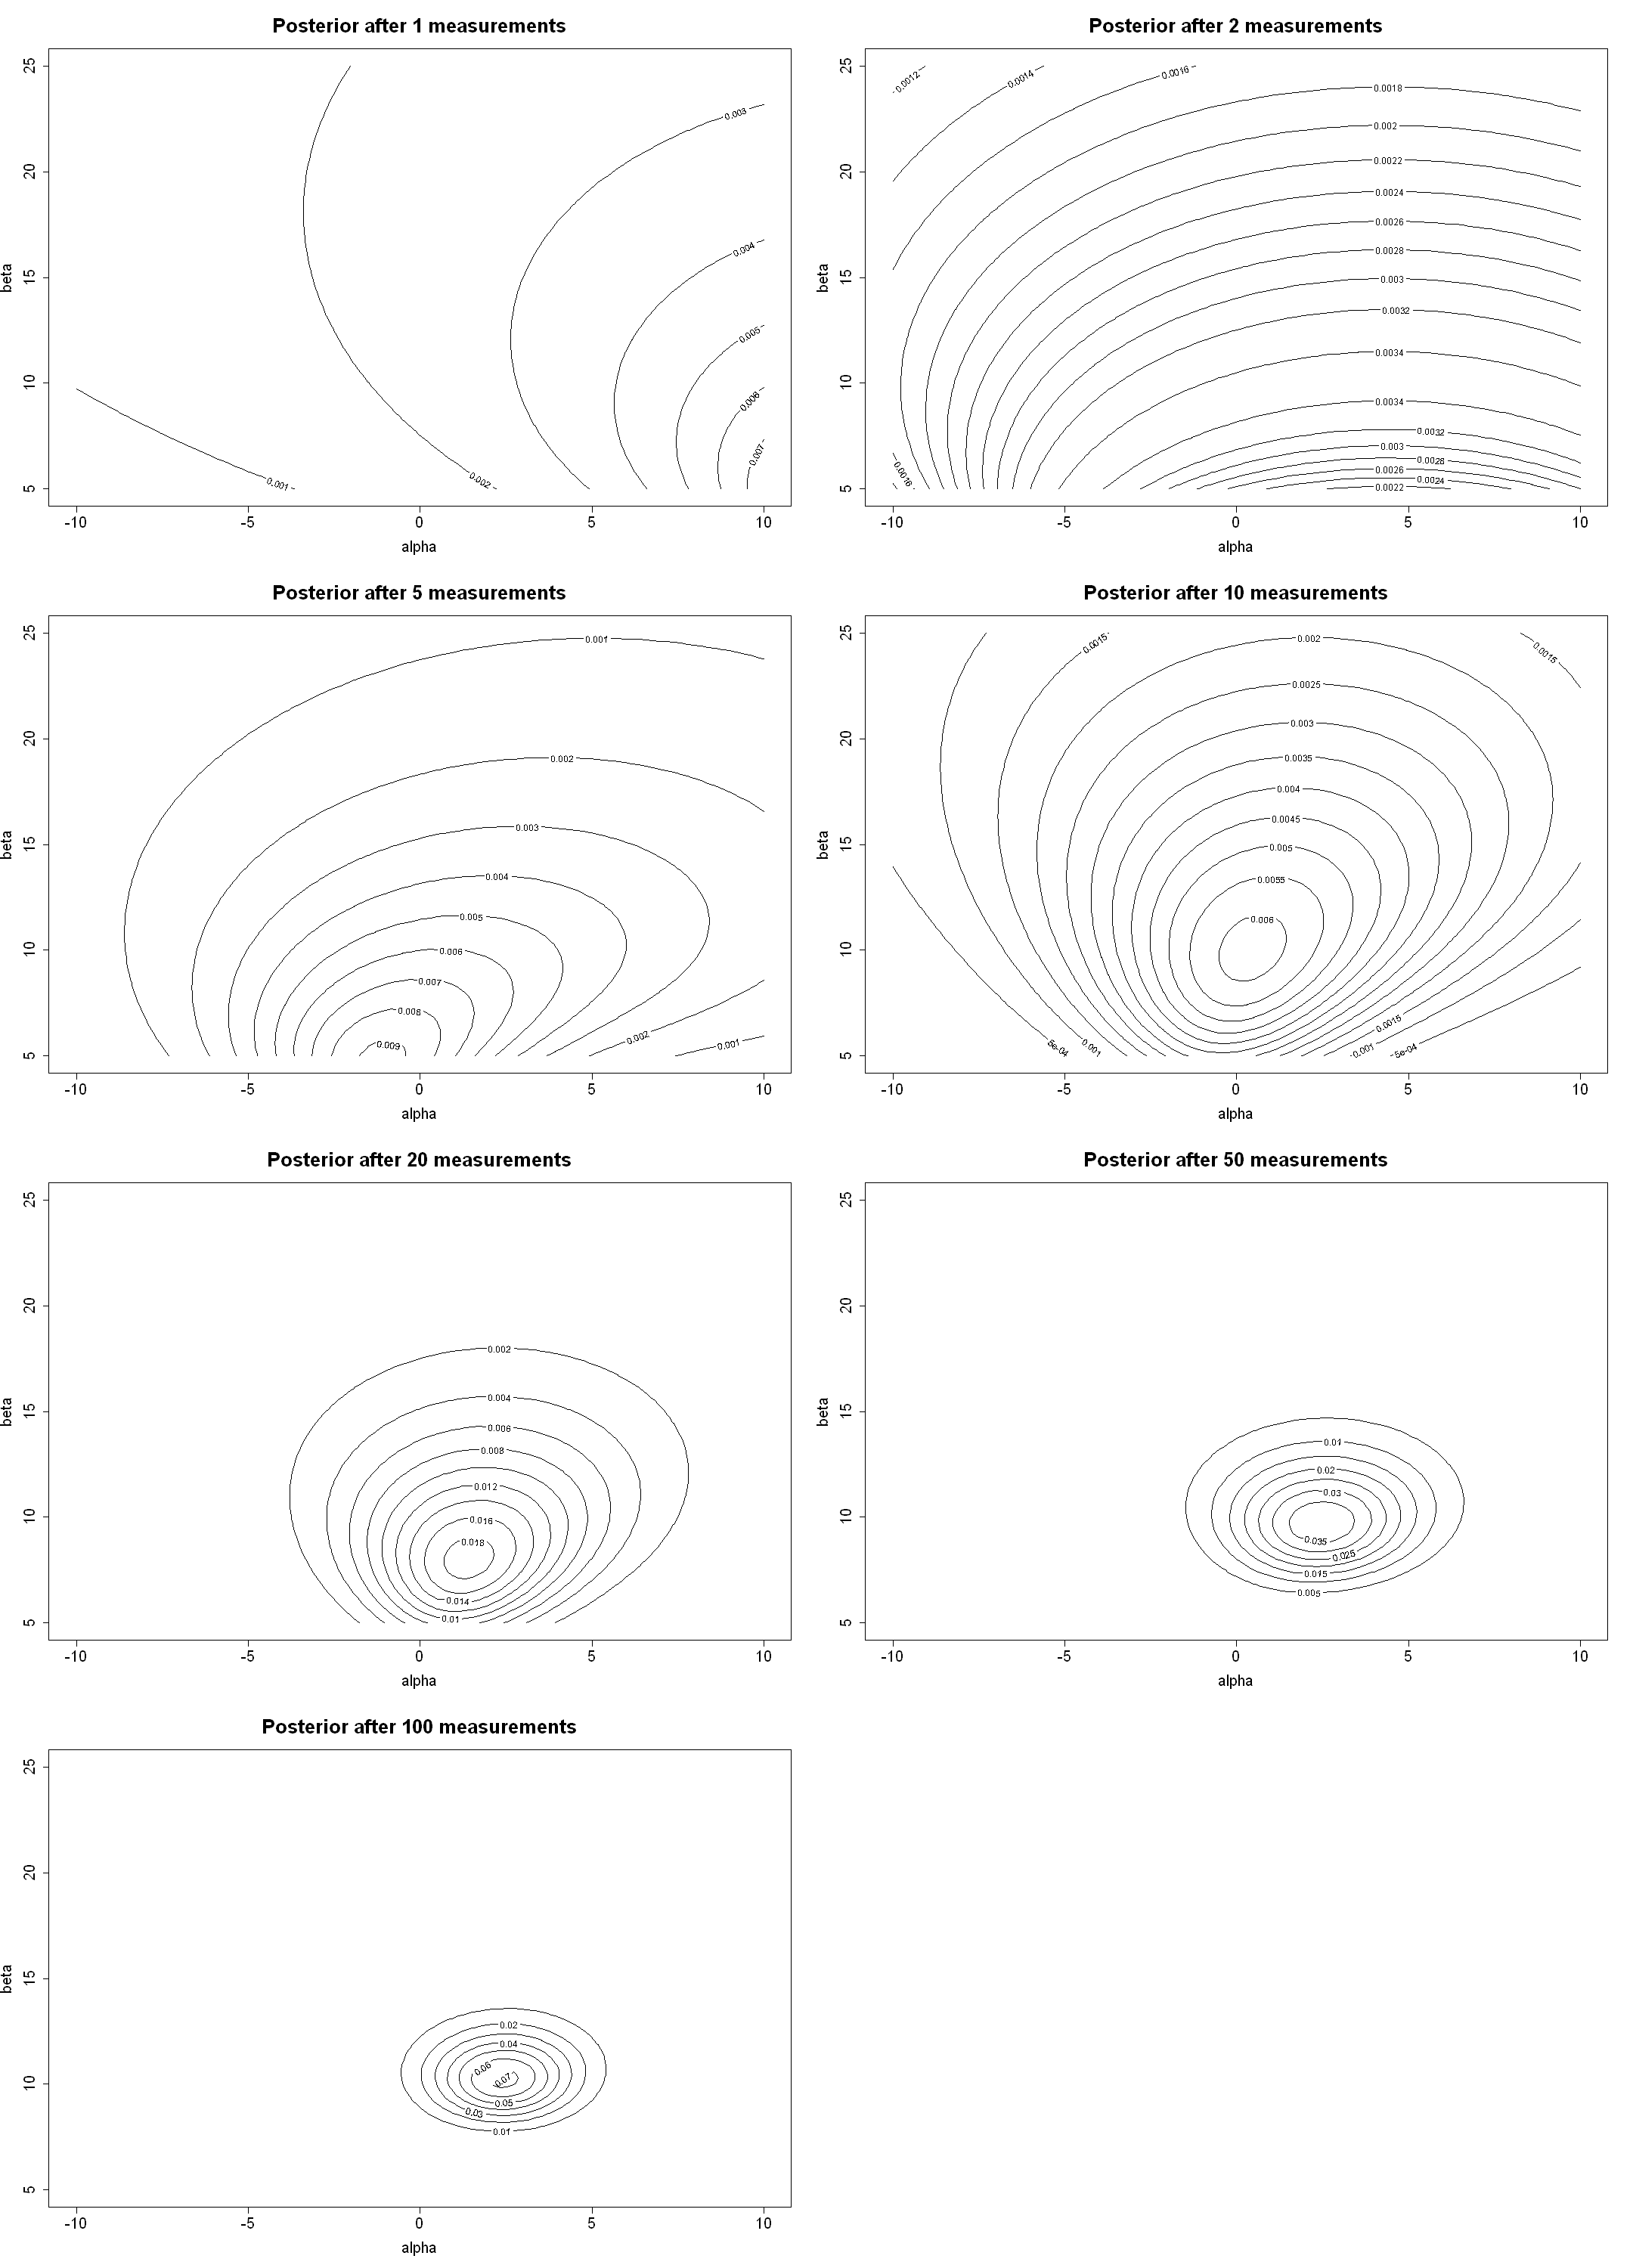

In [16]:
fig(18, 25)
par(mfrow = c(4,2))
#par(mar = c(3,3,3,3))
n_data <- c(1, 2, 5, 10, 20, 50, 100)
for (n in n_data){
    Norm <- adaptIntegrate(posterior, lowerLimit = c(a_min, b_min), upperLimit = c(a_max, b_max), x = data[1:n])$integral
    PP <- apply(p_list, 1, posterior, x = data[1:n])/Norm
    PP <- matrix(PP, nrow = length(a_list))
    contour(a_list, b_list, PP, xlab = 'alpha', ylab = 'beta', main = paste('Posterior after', as.character(n), 'measurements'), cex.axis = 1.5, cex.lab = 1.5, cex.main = 2)
}

Let us show the final PDF after 100 measurements in a coloured contou plot and 3D plot

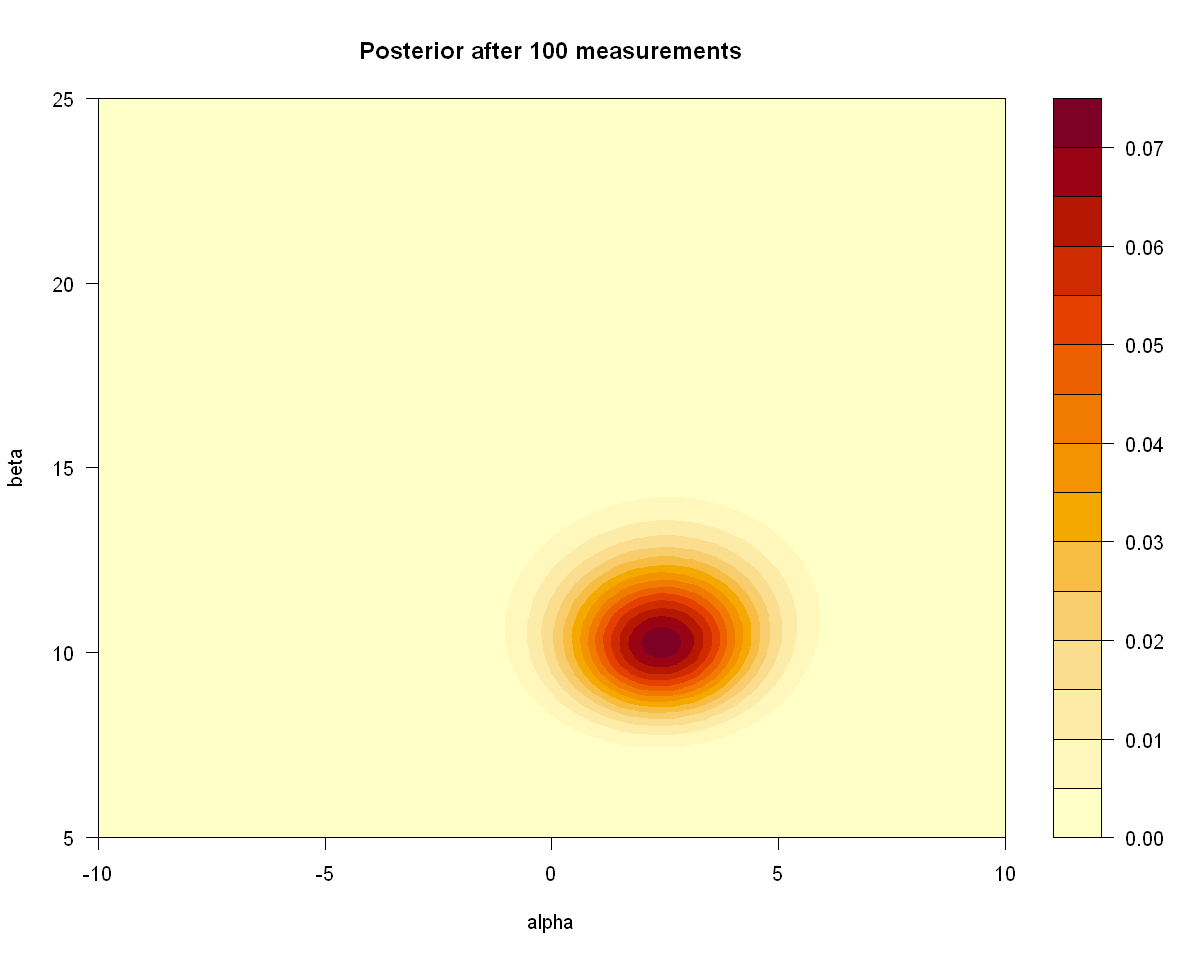

In [17]:
fig(10,8)
filled.contour(a_list, b_list, PP, xlab = 'alpha', ylab = 'beta', main = paste('Posterior after', as.character(n), 'measurements'))

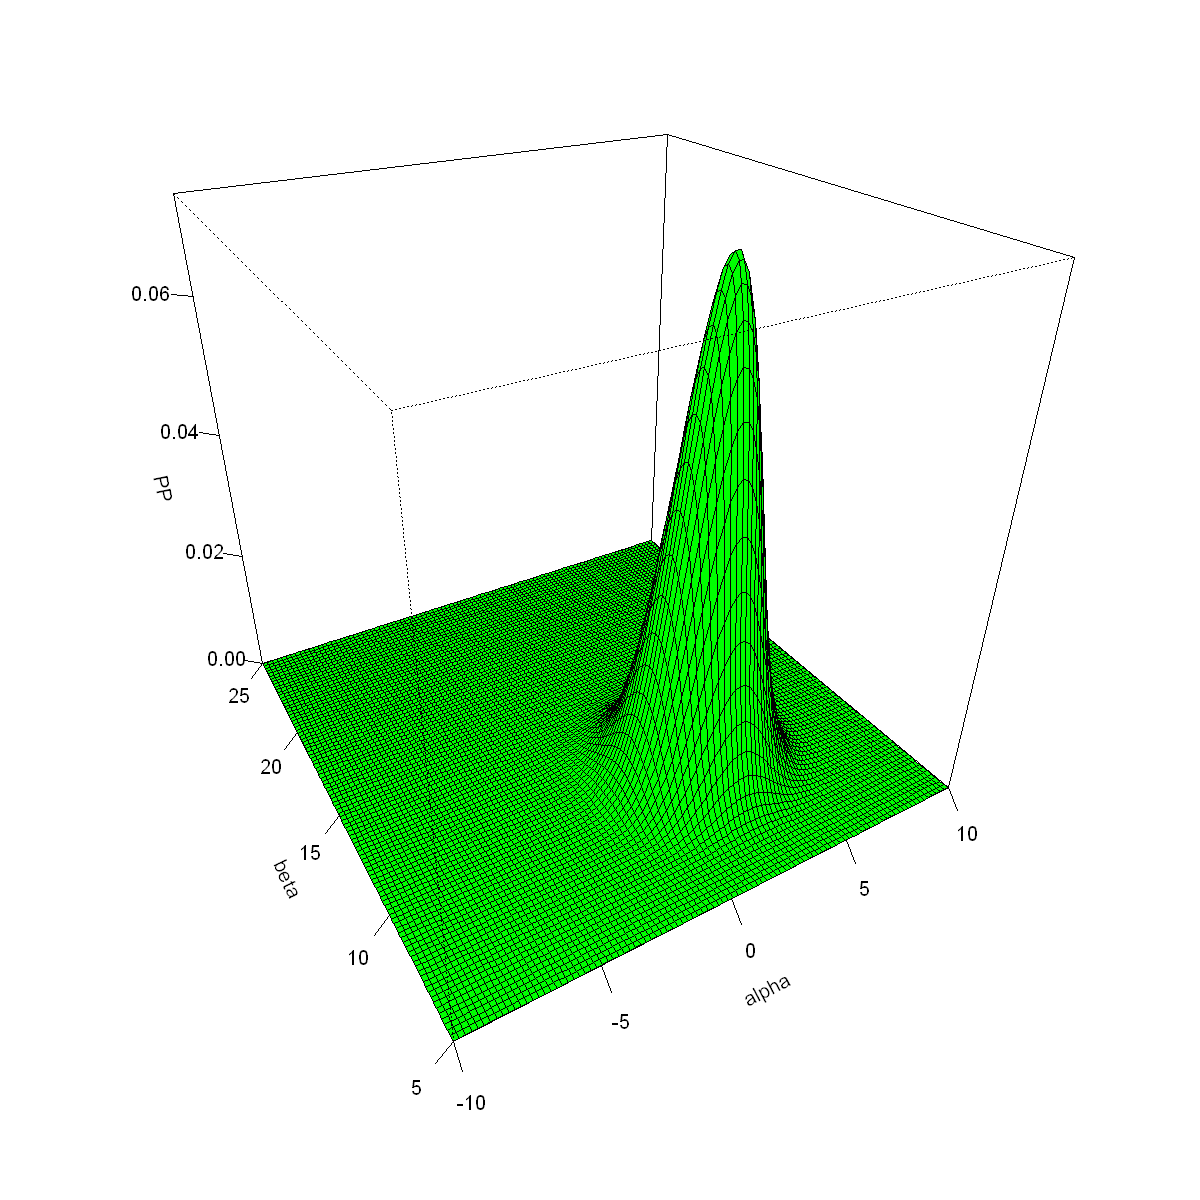

In [18]:
fig(10,10)
persp(a_list, b_list, PP, col = 'green', theta = -30, phi = 30, axes = T, ticktype = 'detailed', xlab = 'alpha', ylab = 'beta', )

Using the function _optim_ we can find the minimum of a target function. If we define _f_ to be the _posterior_ multiplied by $-1$ we can find our best estimation of parameters $\alpha$ and $\beta$. Which are close to the true values ($A = 2$, $B = 10$)

In [19]:
Norm <- adaptIntegrate(posterior, lowerLimit = c(a_min, b_min), upperLimit = c(a_max, b_max), x = data)$integral

In [20]:
f <- function(p, x){
    -1*posterior(p,x)/Norm
}
best <- optim(c(1, 5), f, x = data)$par
cat('The best estimation for alpha and beta parameters are:\nalpha =', best[1], '\nbeta =', best[2])

The best estimation for alpha and beta parameters are:
alpha = 2.415823 
beta = 10.2675

## Exercise 3

* ### Width Analysis

We want to study the effects of varying the signal __width__ in a Signal+Background problem.
Also in this case the loglikelihood and logposterior are used for simplicity. We used a unifor prior in the A;B space.
In the next cell the _posteriors_ are computed for different __w__.

In [21]:
set.seed(12)
signal <- function(x, a, b, x0, w, t) {
    t*(a*exp(-(x-x0)^2/(2*w^2)) + b)
}

x0 <- 0
A.true <- 2
B.true <- 1 
Dt <- 5

Vector of widths

In [22]:
ws <- c(0.1, 0.25, 1, 2, 3)

In the next plots, the initial signal and the poisson counts are reported for different values of the parameter __w__.

In [23]:
a_min <- 0
a_max <- 4
b_min <- 0.5
b_max <- 1.5

a_list <- seq(a_min, a_max, length.out = 100)
b_list <- seq(b_min, b_max, length.out = 100)
p_list <- expand.grid(a_list, b_list)

delta_a <- a_list[2]-a_list[1]
delta_b <- b_list[2]-b_list[1]

In the next plots the original data are shown. The final posterior with the two marginalized distribution are also plotted.

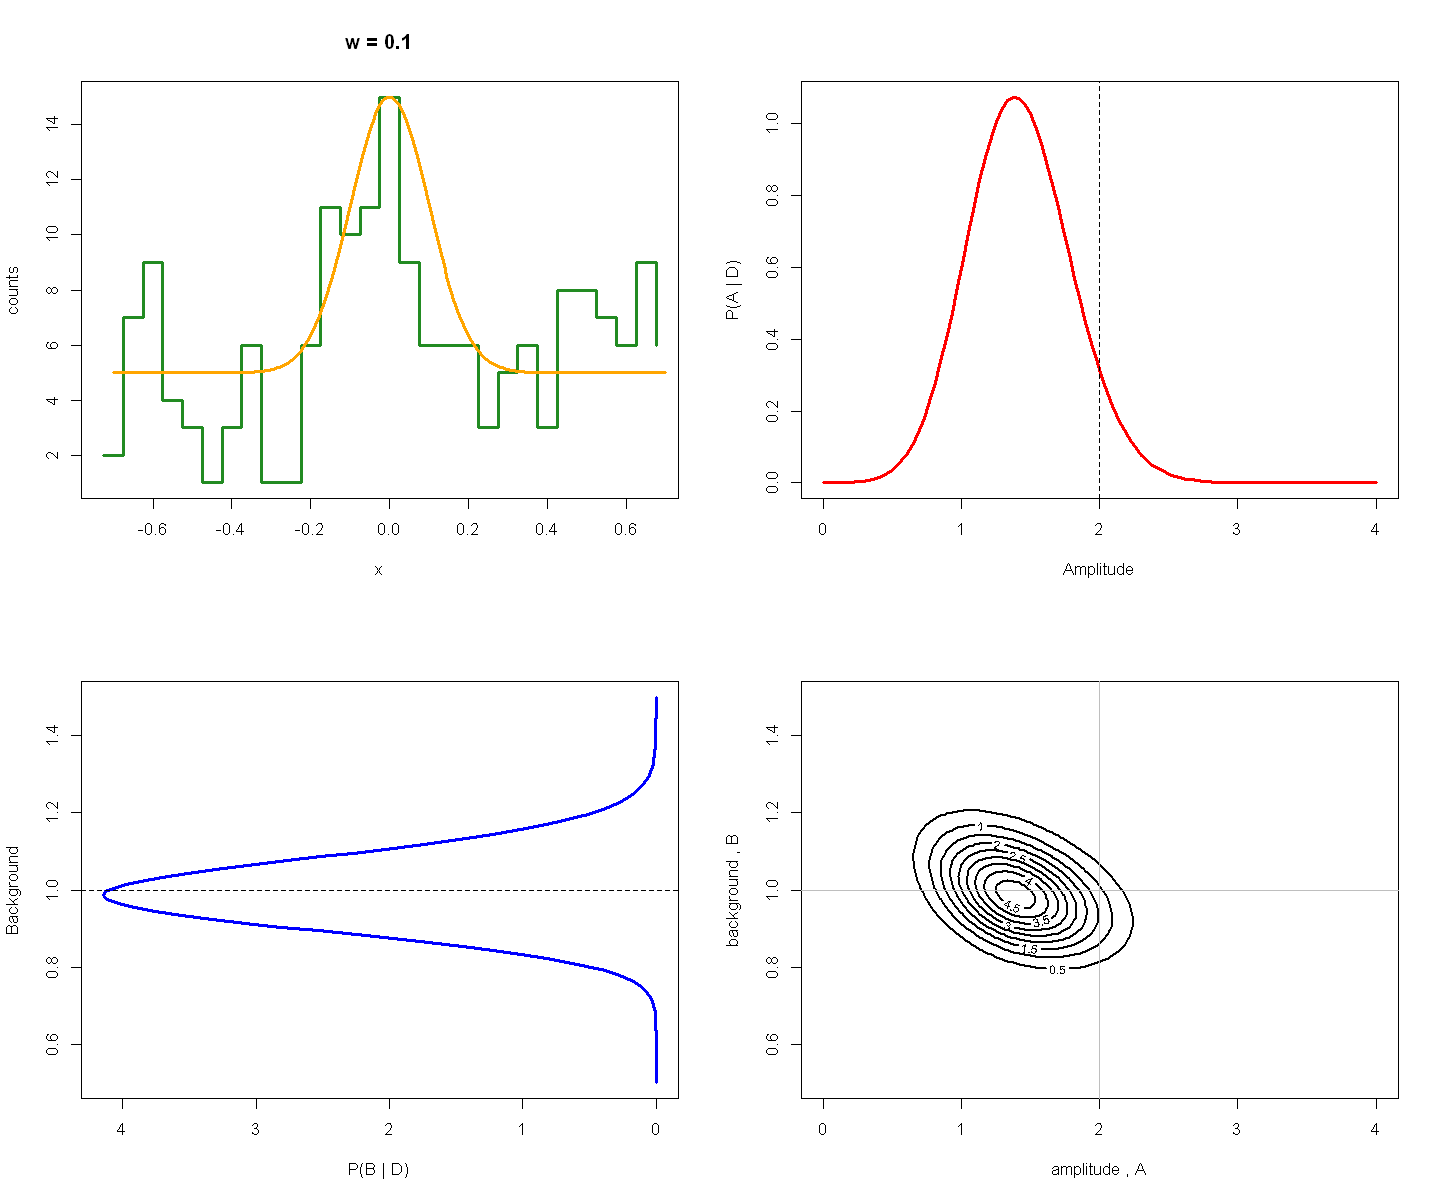

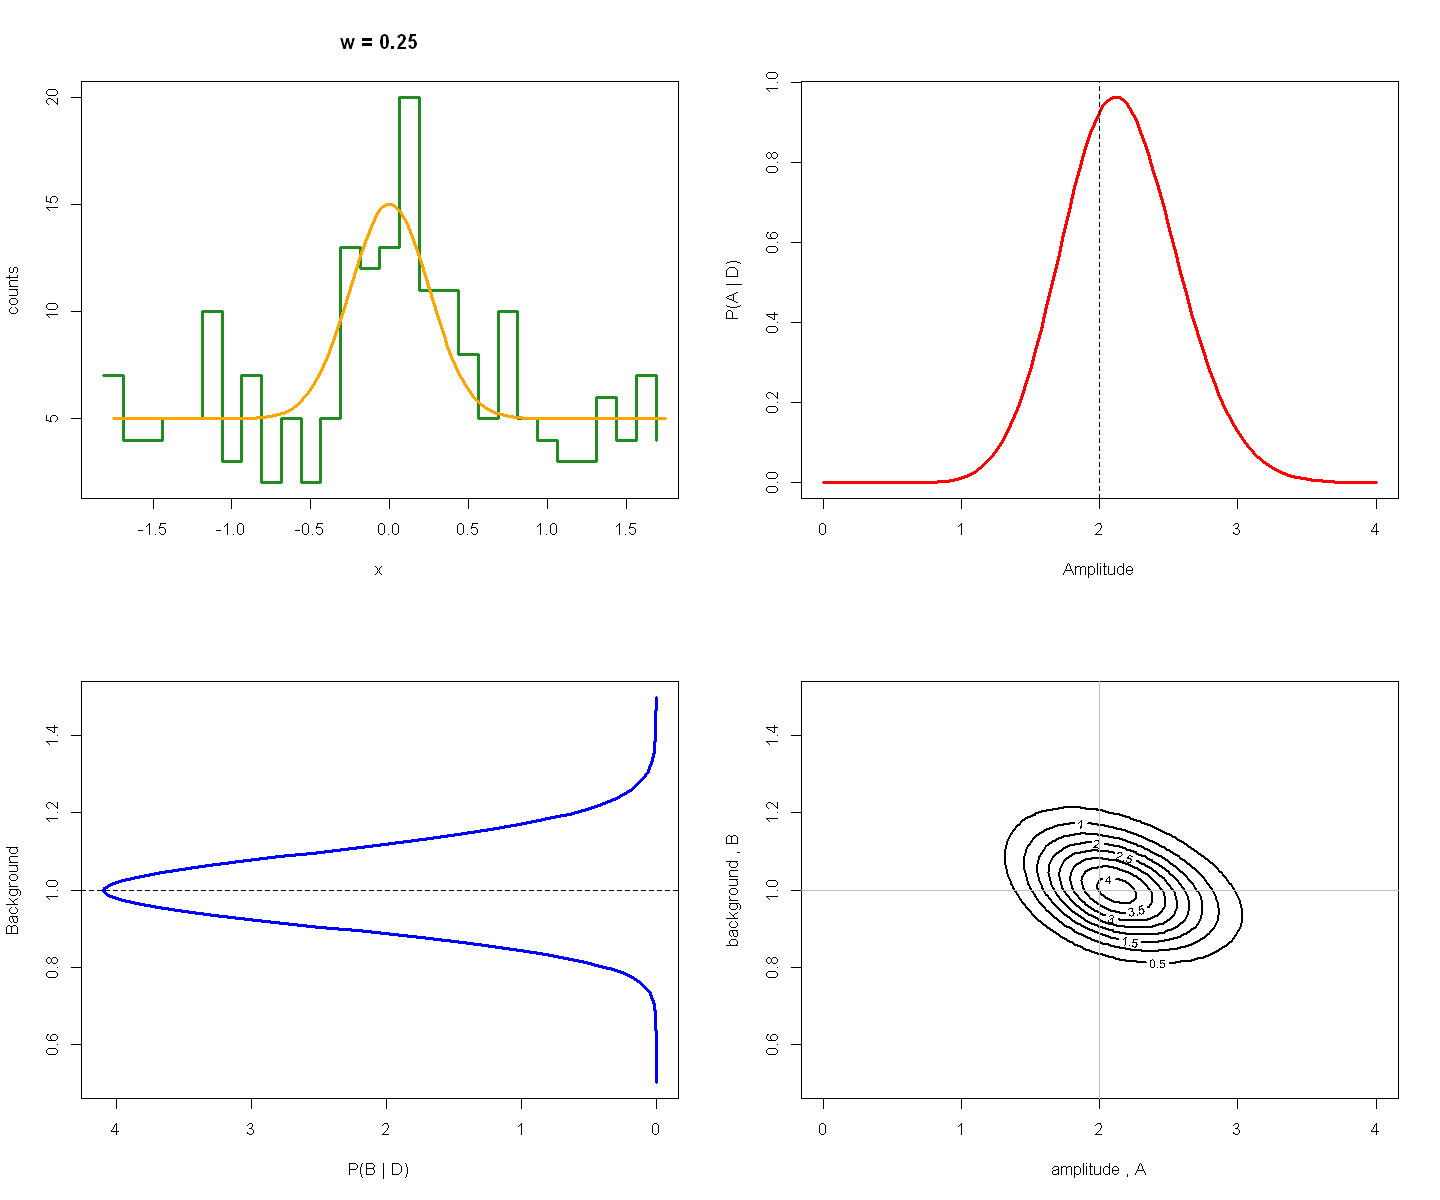

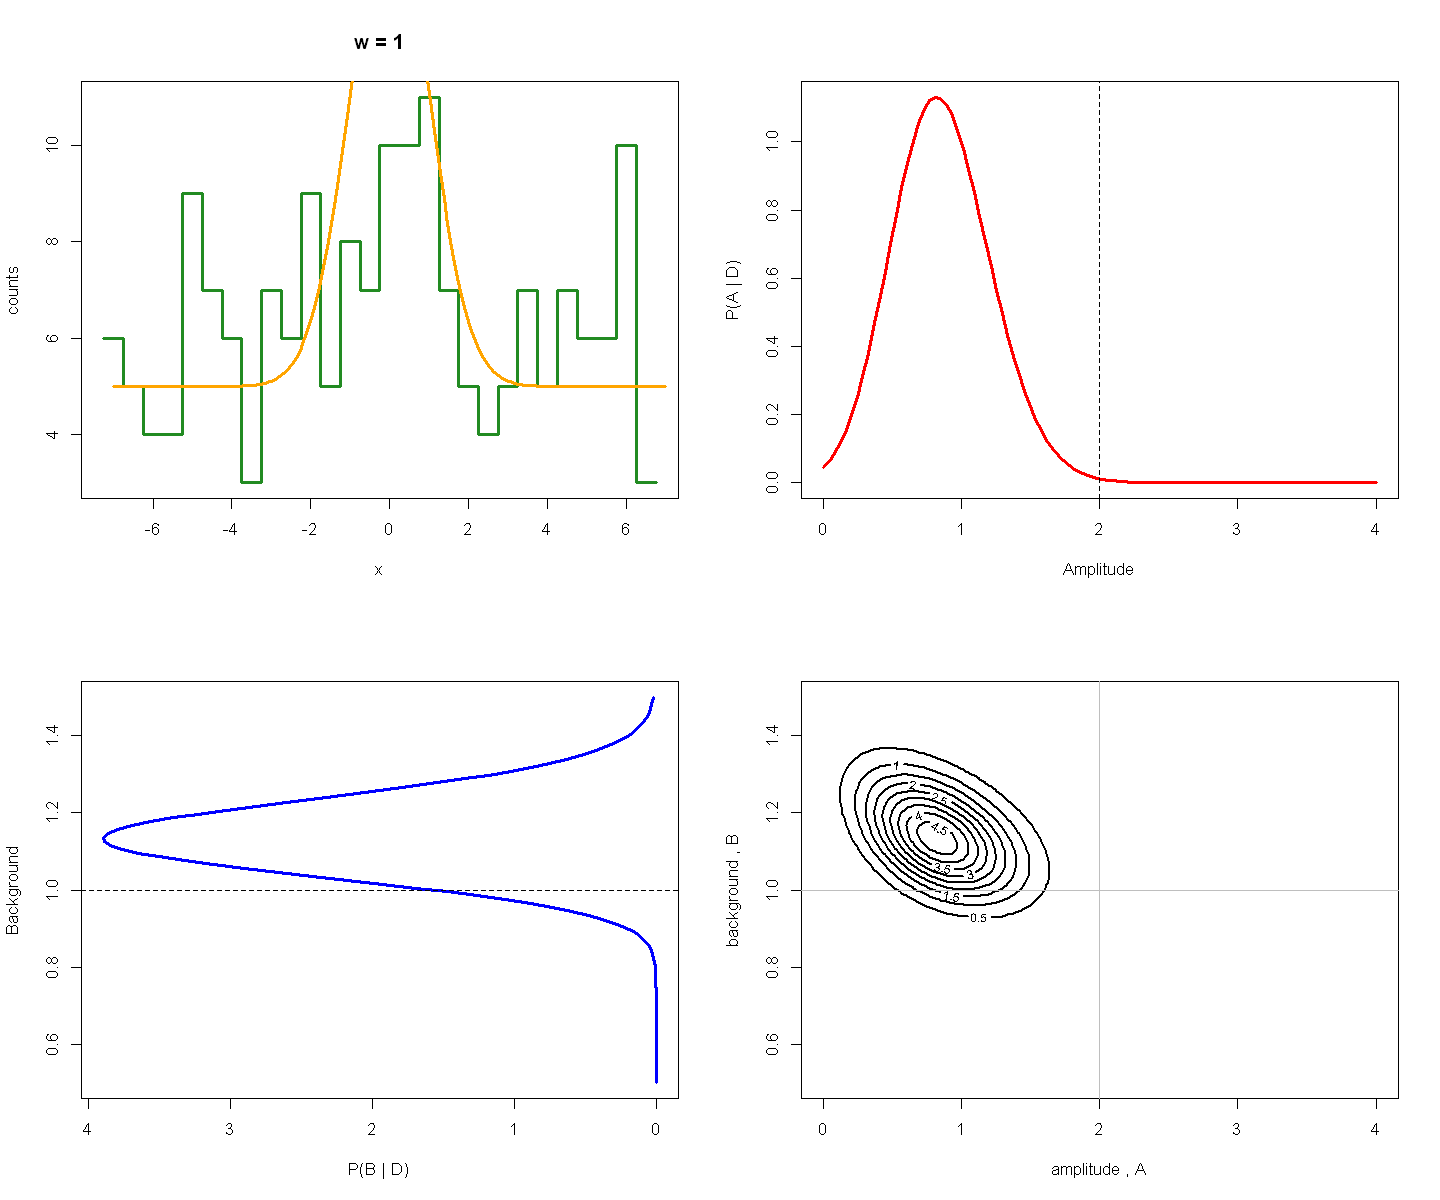

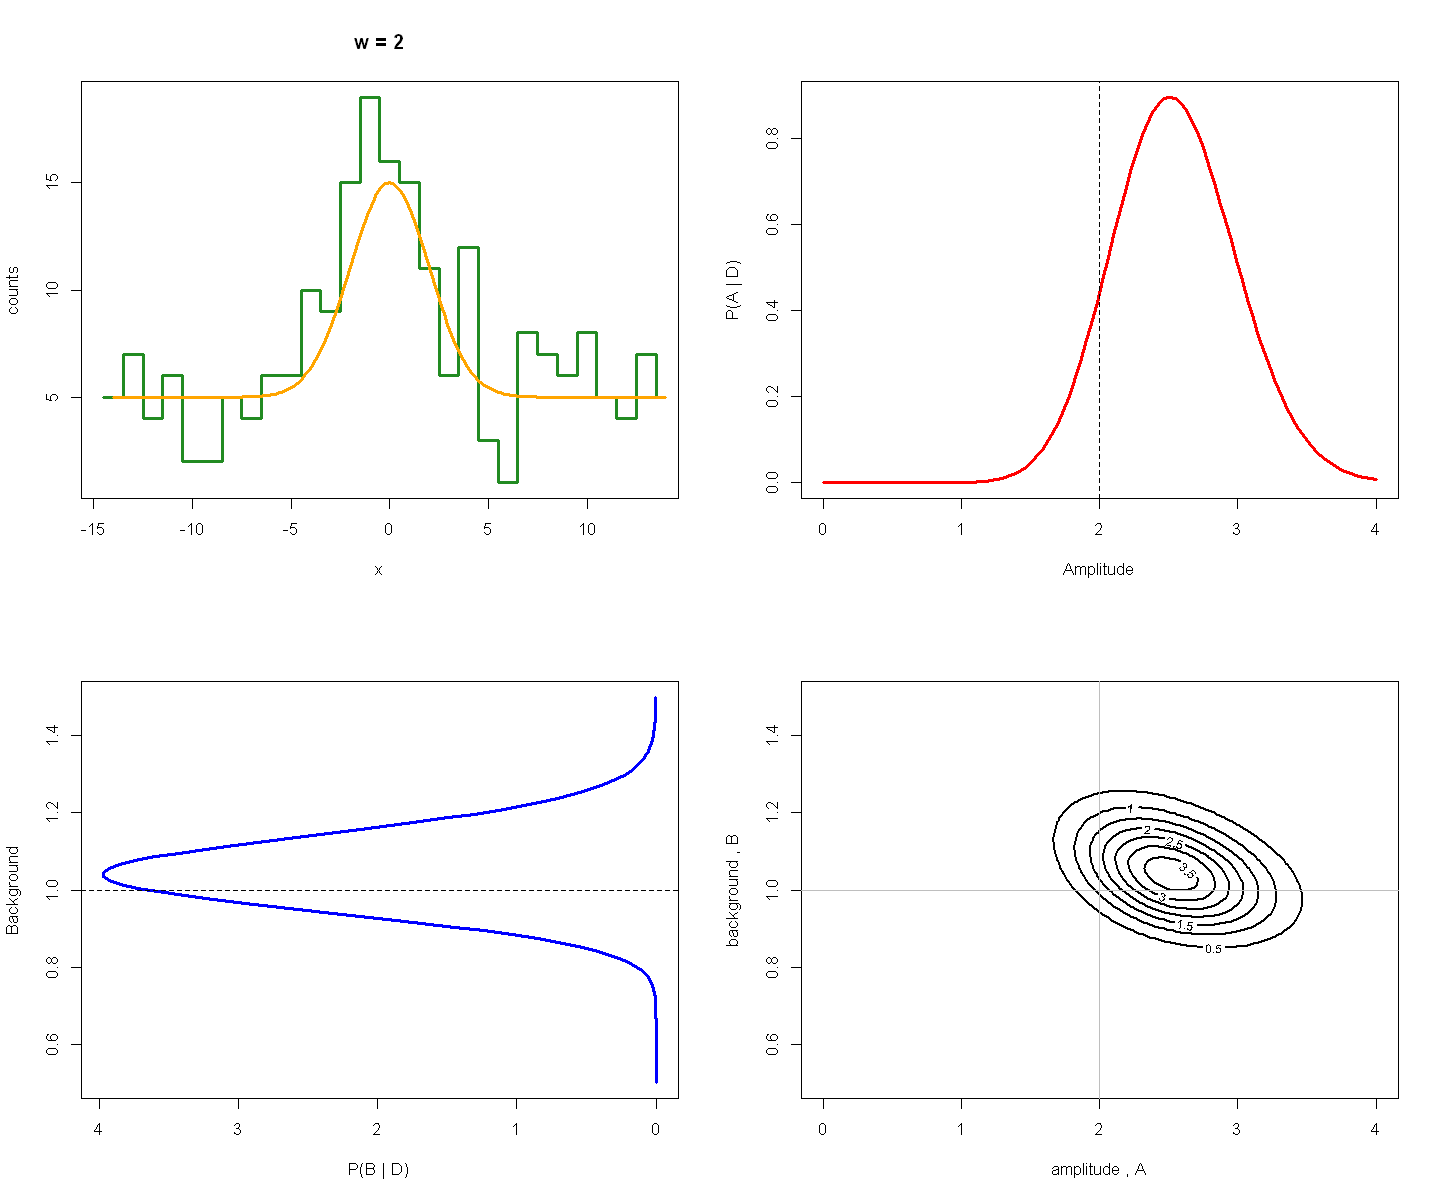

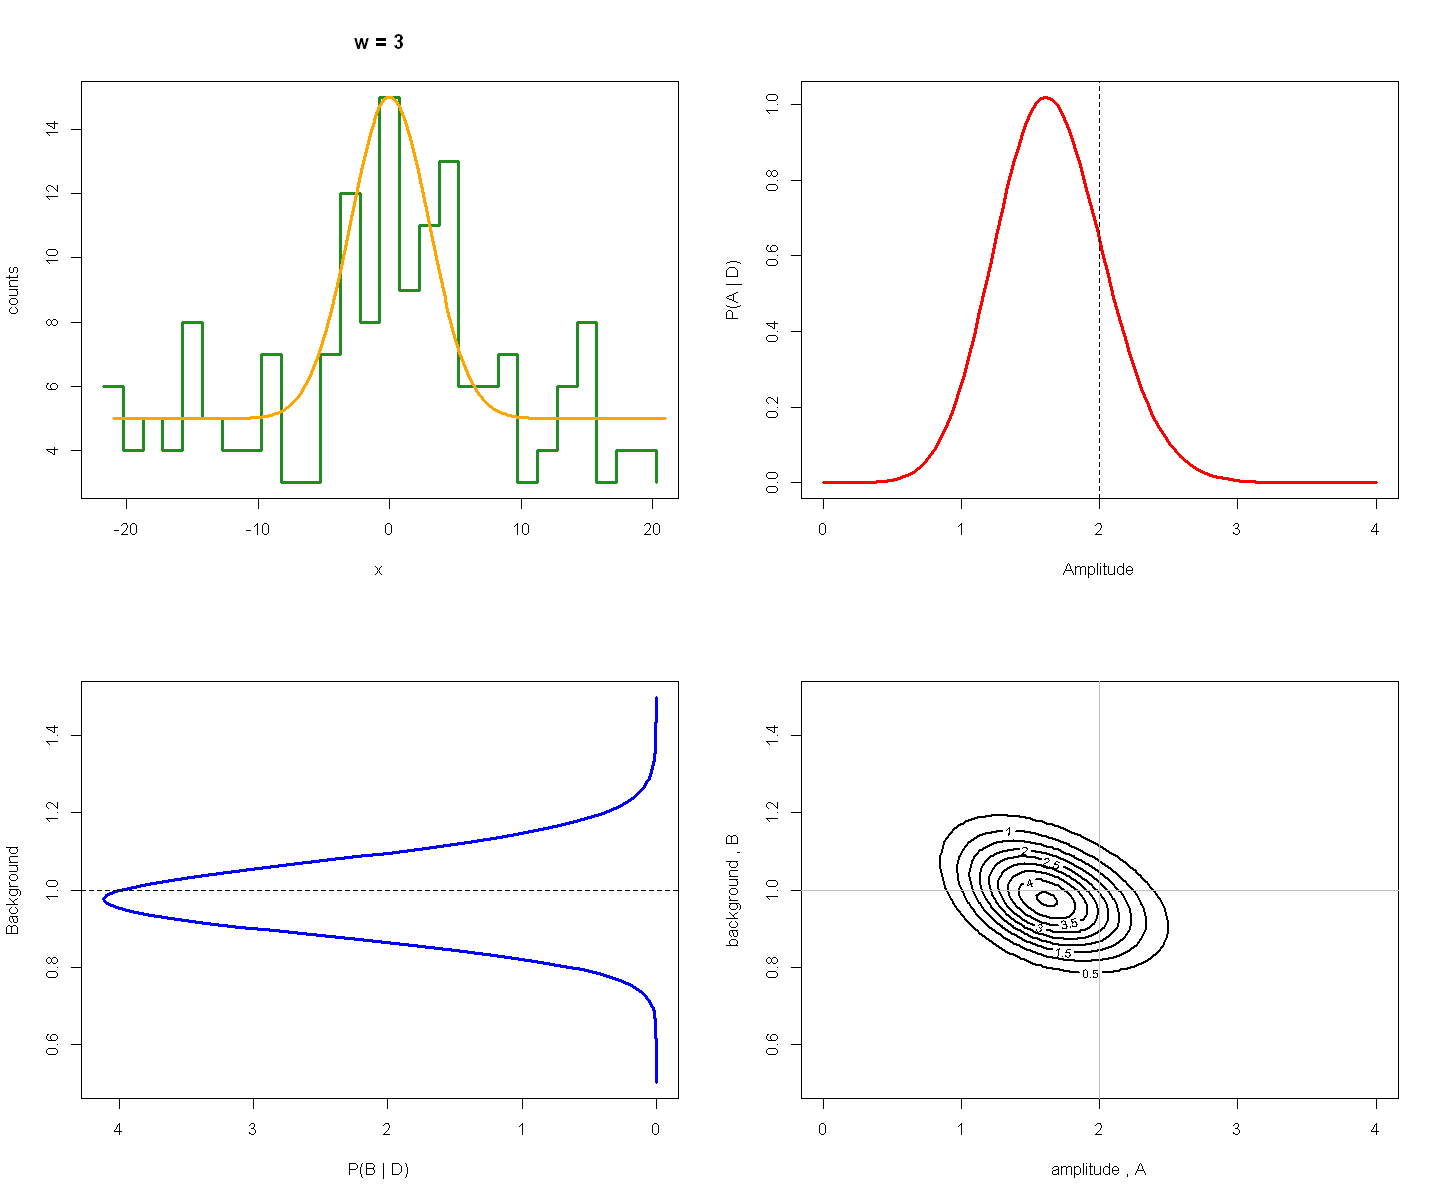

In [24]:
loglike <- function(p, d, x, x0, w, t){
    sum(dpois(d, lambda=signal(x, p[1], p[2], x0, w, t), log=TRUE))
}


posterior <- function(p, d, x, x0, w, t){
    exp(loglike(p, d, x, x0, w, t))
}

fig(12, 10)
par(mfrow = c(2, 2))

M_a <- c()
M_b <- c()
SD_a <- c()
SD_b <- c()

for (w in ws){
    
    xdat <- seq(from=-7*w, to=7*w, by=0.5*w)
    s.true <- signal(xdat , A.true , B.true , x0, w, Dt)
    ddat <- rpois(length(s.true), s.true)
    xplot <- seq(from=min(xdat), to=max(xdat), by=0.05*w)
    splot <- signal(xplot , A.true , B.true , x0, w, Dt)
    xdat.off <- xdat - 0.25*w
    plot(xdat.off, ddat , type='s', col='forestgreen', lwd=3, xlab="x", ylab="counts", main = paste('w =', as.character(w)))
    lines(xplot , splot, lwd = 3, col = 'orange')
    

    Norm <- adaptIntegrate(posterior, lowerLimit = c(a_min, b_min), upperLimit = c(a_max, b_max), d = ddat, x = xdat, x0 = x0, w = w, t = Dt)$integral
    PP <- apply(p_list, 1, posterior, d = ddat, x = xdat, x0 = x0, w = w, t = Dt)/Norm
    PP <- matrix(PP, nrow = length(a_list))
    
    p_a_D <- apply(PP, 1, sum)
    p_a_D <- p_a_D/(delta_a*sum(p_a_D))
    p_b_D <- apply(PP, 2, sum)
    p_b_D <- p_b_D/(delta_b*sum(p_b_D))
    
    mean_a <- delta_a * sum(a_list * p_a_D)
    M_a <- append(M_a, mean_a)
    mean_b <- delta_b * sum(b_list * p_b_D)
    M_b <- append(M_b, mean_b)
    sd_a <- sqrt(delta_a * sum((a_list-mean_a)^2 * p_a_D))
    SD_a <- append(SD_a, sd_a)
    sd_b <- sqrt(delta_b * sum((b_list-mean_b)^2 * p_b_D))
    SD_b <- append(SD_b, sd_b)
    
    plot(a_list, p_a_D, xlab= "Amplitude", ylab="P(A | D)", type="l", lwd=2.5, col = 'red')
    abline(v = A.true, lty = 2)
    plot(p_b_D, b_list, ylab= "Background", xlim = rev(range(p_b_D)), xlab="P(B | D)", type="l", lwd=2.5, col = 'blue')
    abline(h = B.true, lty = 2)
    
    contour(a_list, b_list, PP, lwd = 2, xlab="amplitude , A", ylab="background , B") 
    abline(v=2,h=1,col="grey")
}

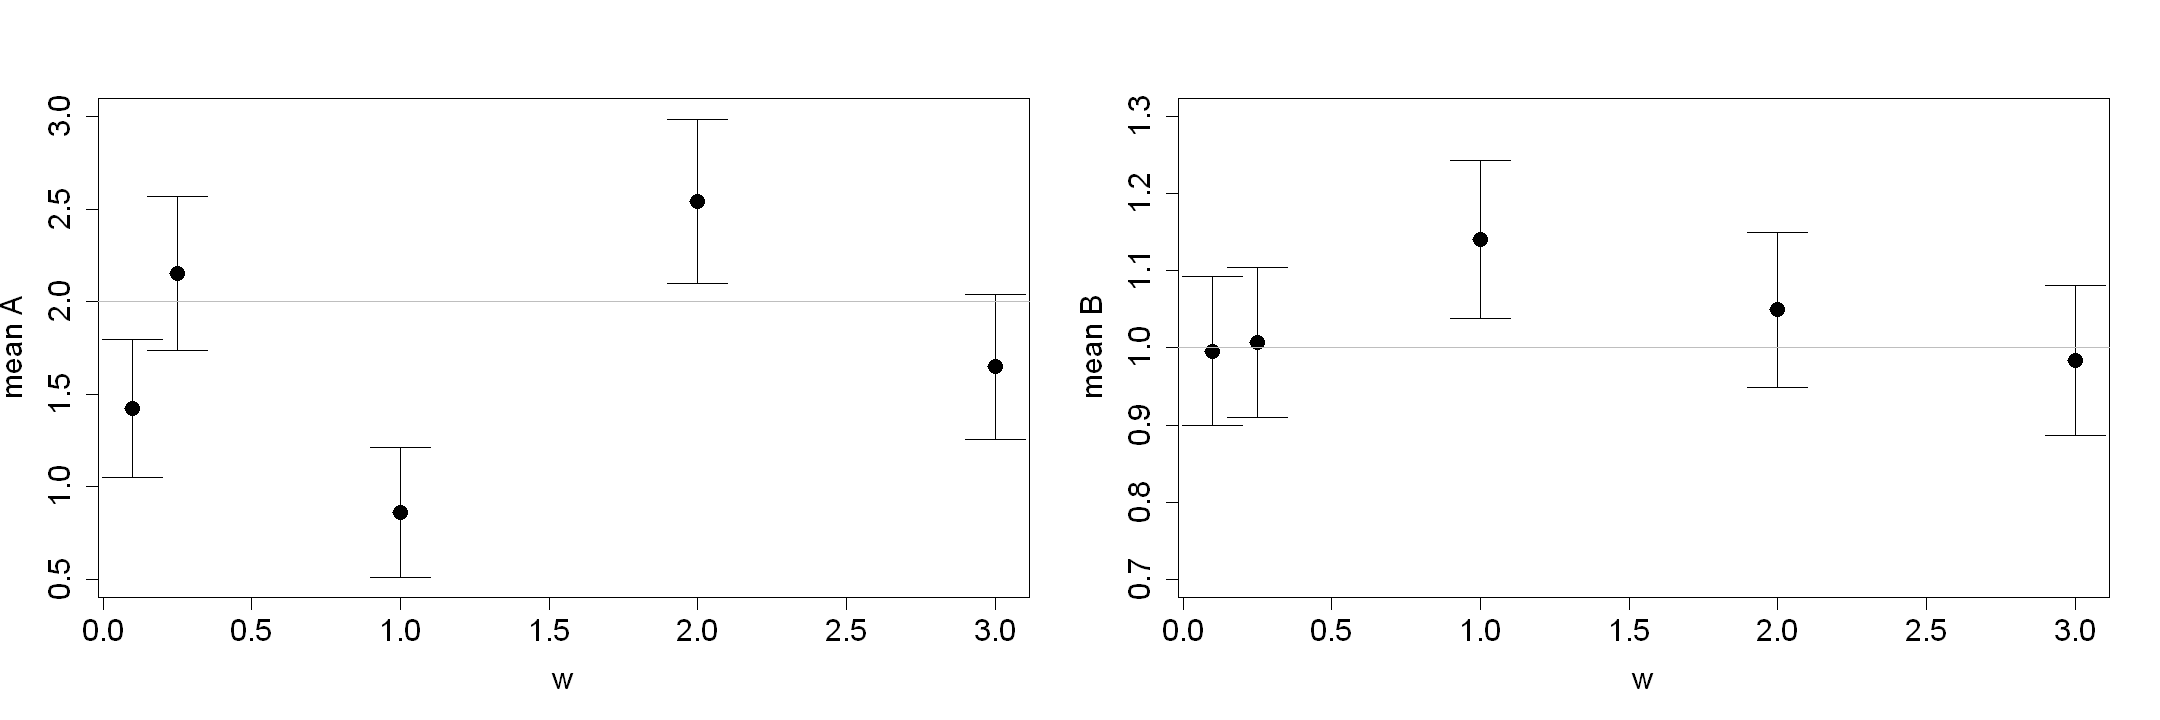

In [25]:
fig(18, 6)
par(mfrow = c(1, 2))
plot(ws, M_a, pch = 19, lwd = 7, cex.axis = 1.5, cex.lab = 1.5, xlab = 'w', ylab = 'mean A', ylim = c(0.5, 3))
arrows(ws, M_a-SD_a, ws, M_a+SD_a, angle = 90, code = 3)
abline(h = A.true, col = 'grey')
plot(ws, M_b, pch = 19, lwd = 7, cex.axis = 1.5, cex.lab = 1.5, xlab = 'w', ylab = 'mean B', ylim = c(0.7, 1.3))
arrows(ws, M_b-SD_b, ws, M_b+SD_b, angle = 90, code = 3)
abline(h = B.true, col = 'grey')

At first sight we cannot see the impact of changing __w__ in parameter recognition performance.

* ### A/B analysis

We want to study the effects of varying the signal ratio between the Amplitude and the Background.

In [26]:
x0 <- 0
A.true <- c(0.5, 1, 2, 5, 10)
B.true <- 1 
w <- 1
Dt <- 5

In [27]:
a_min <- 0
a_max <- 12
b_min <- 0.5
b_max <- 1.5

a_list <- seq(a_min, a_max, length.out = 100)
b_list <- seq(b_min, b_max, length.out = 100)
p_list <- expand.grid(a_list, b_list)


delta_a <- a_list[2]-a_list[1]
delta_b <- b_list[2]-b_list[1]

Also in this case the initial data and the posterior are plotted.

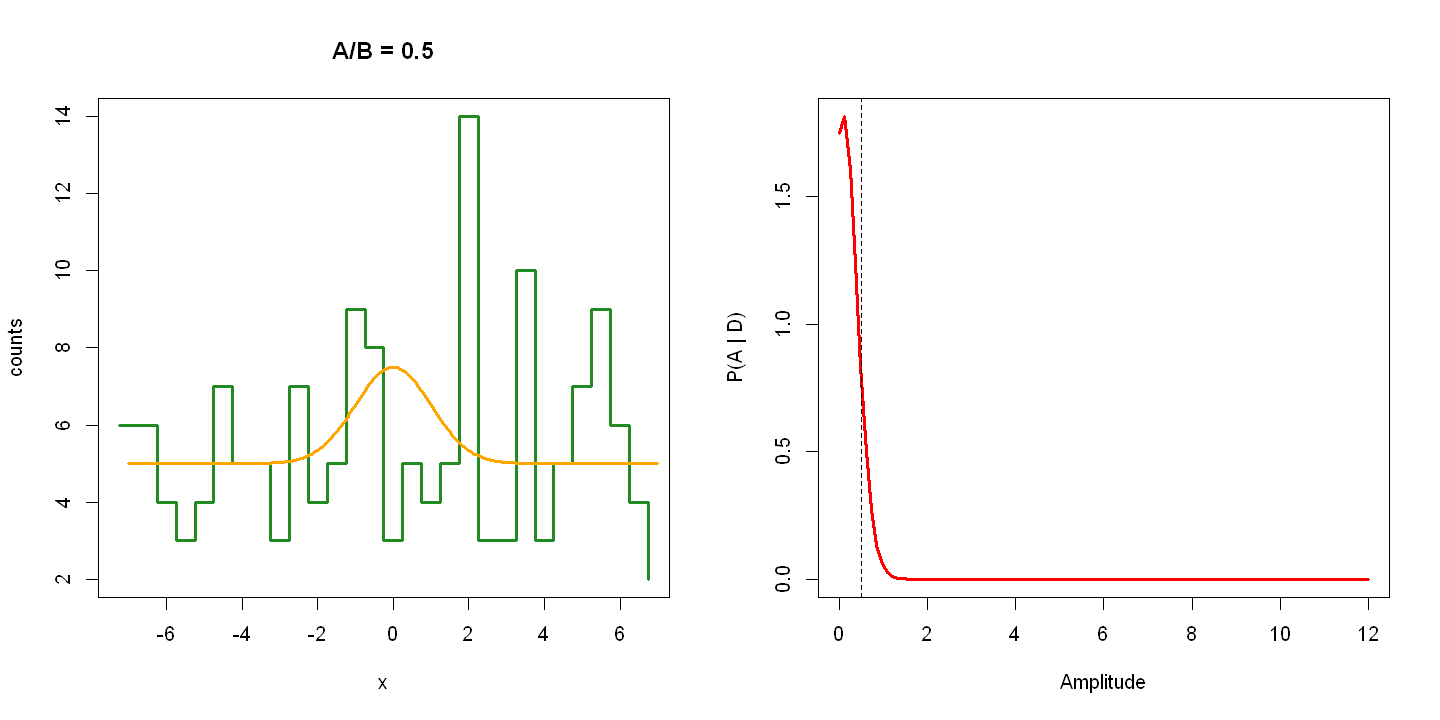

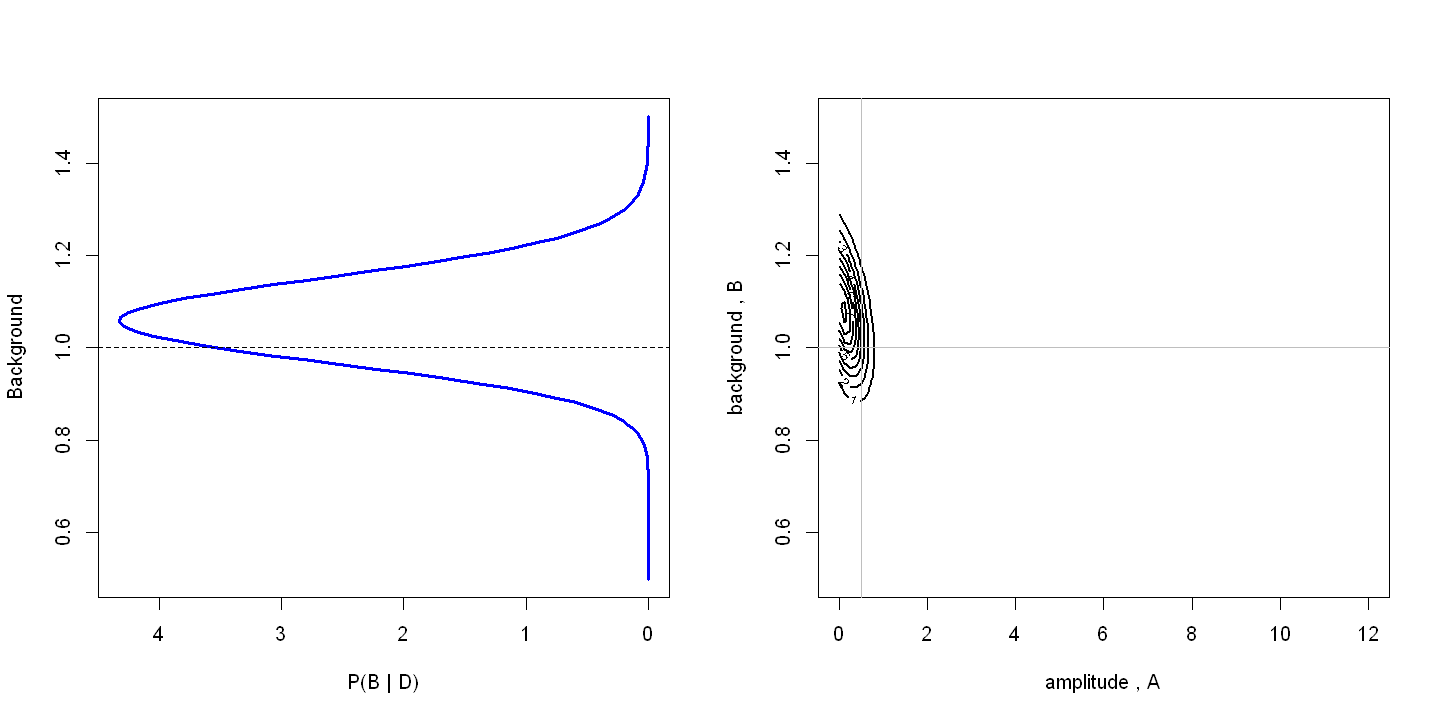

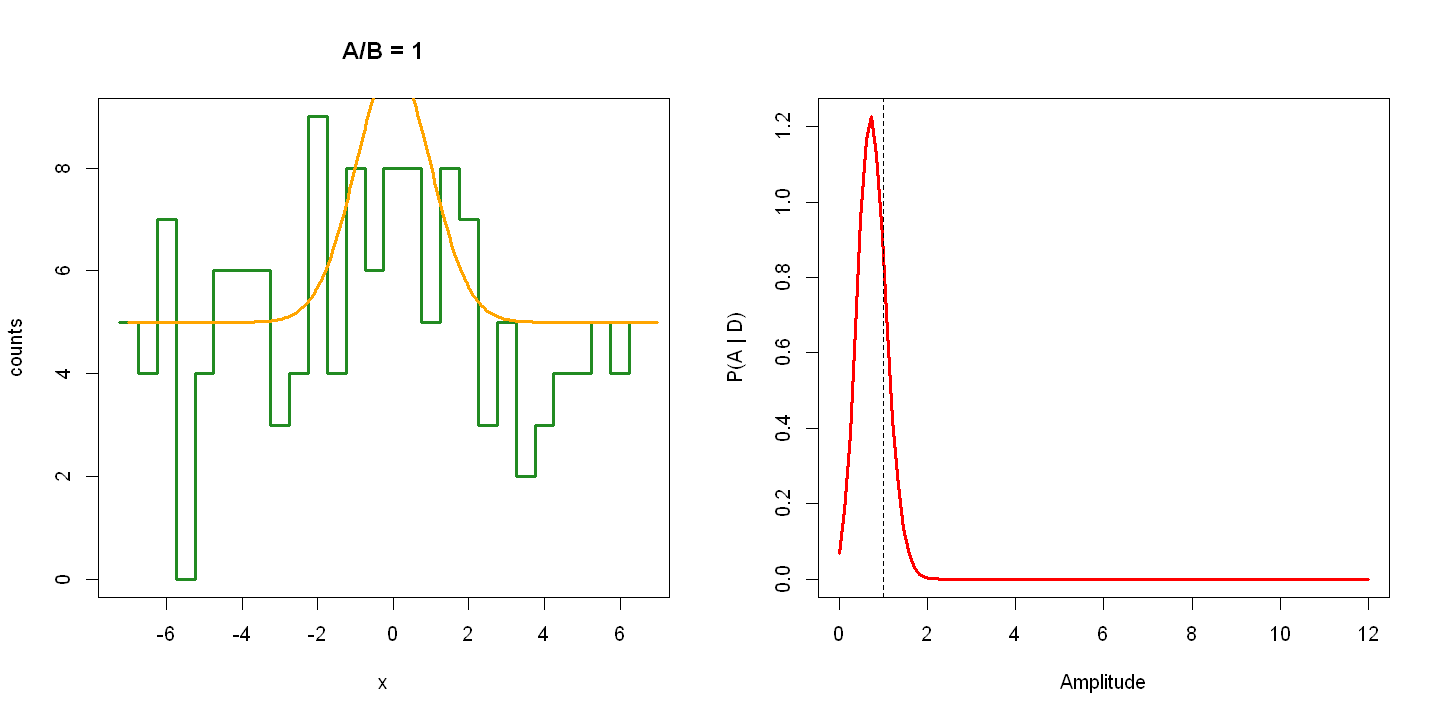

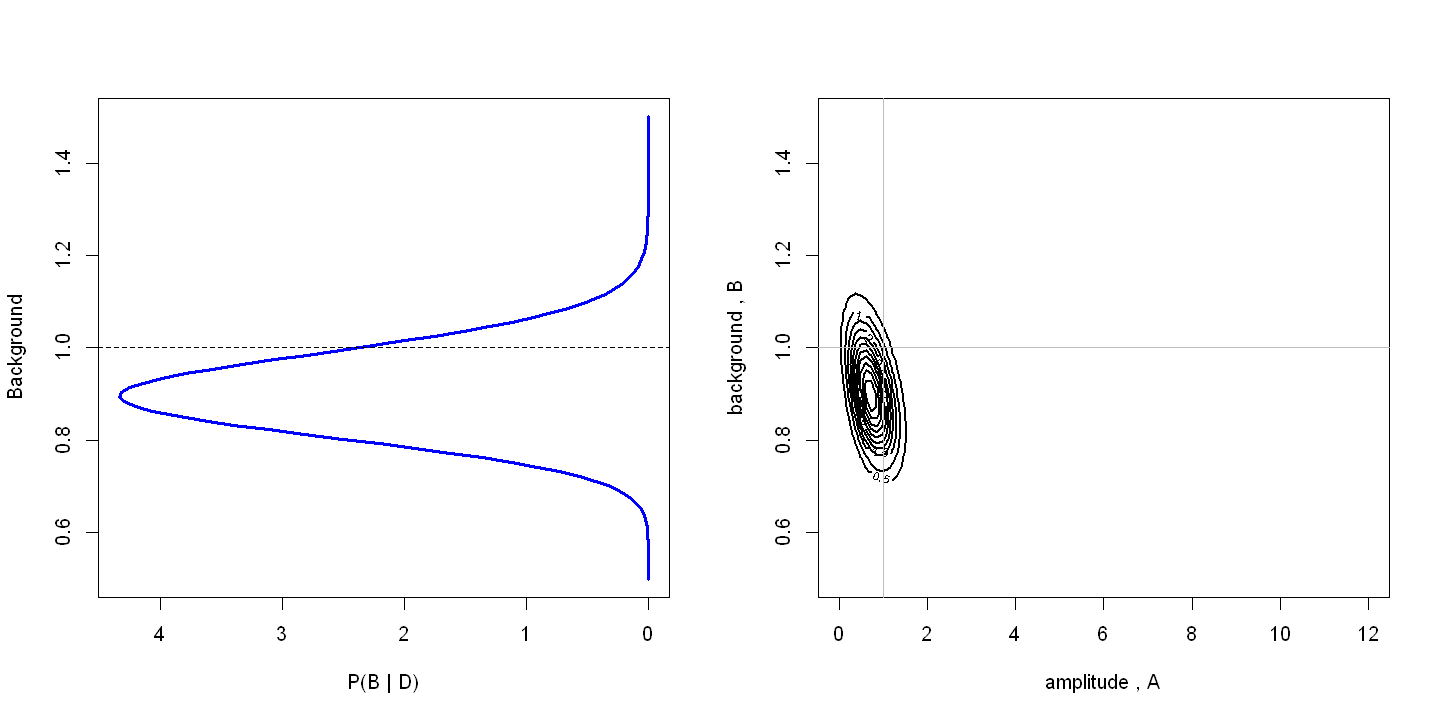

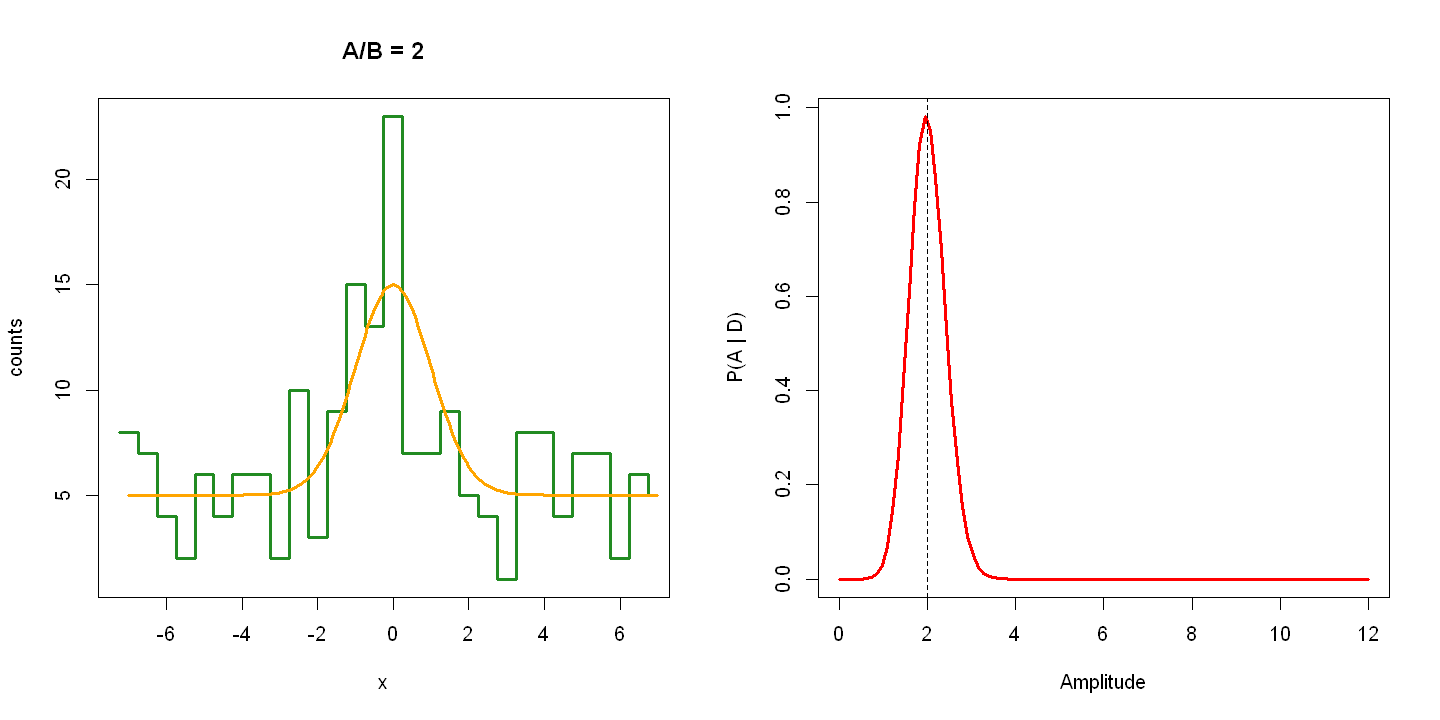

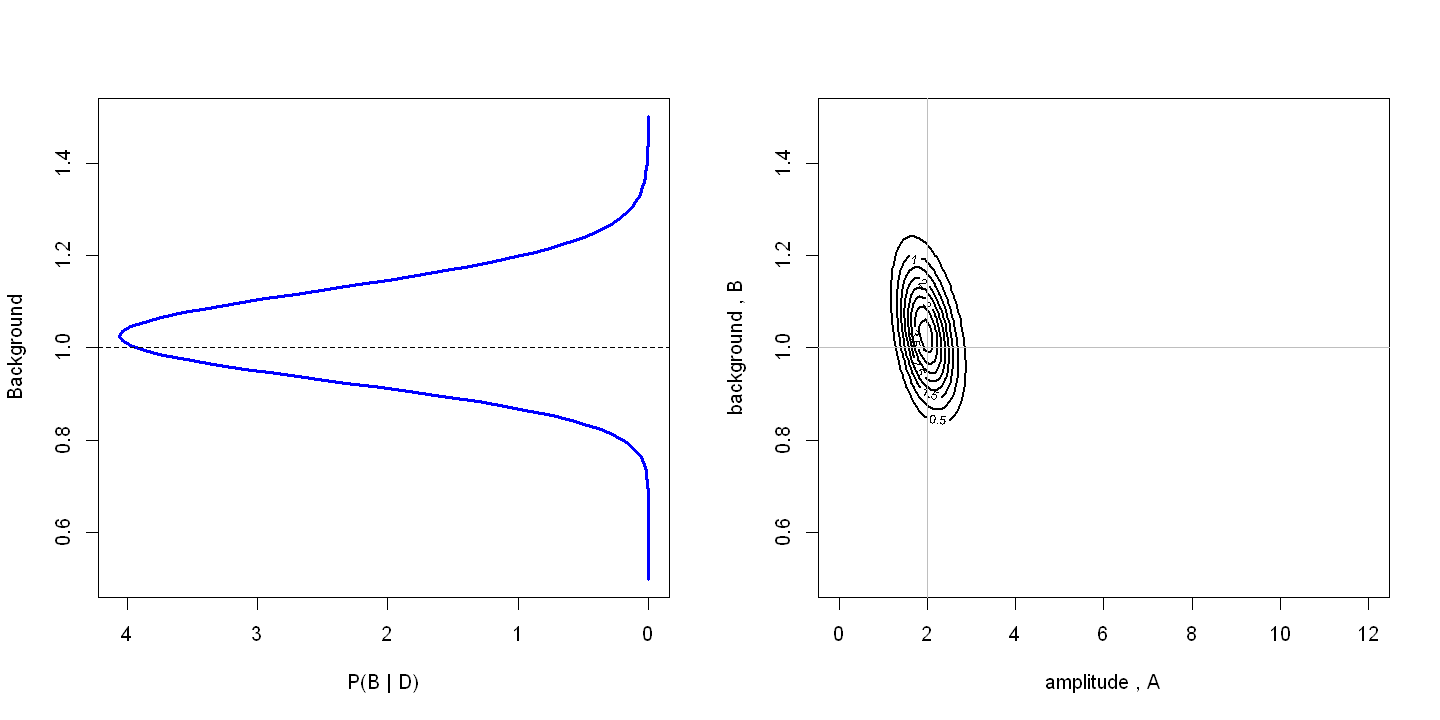

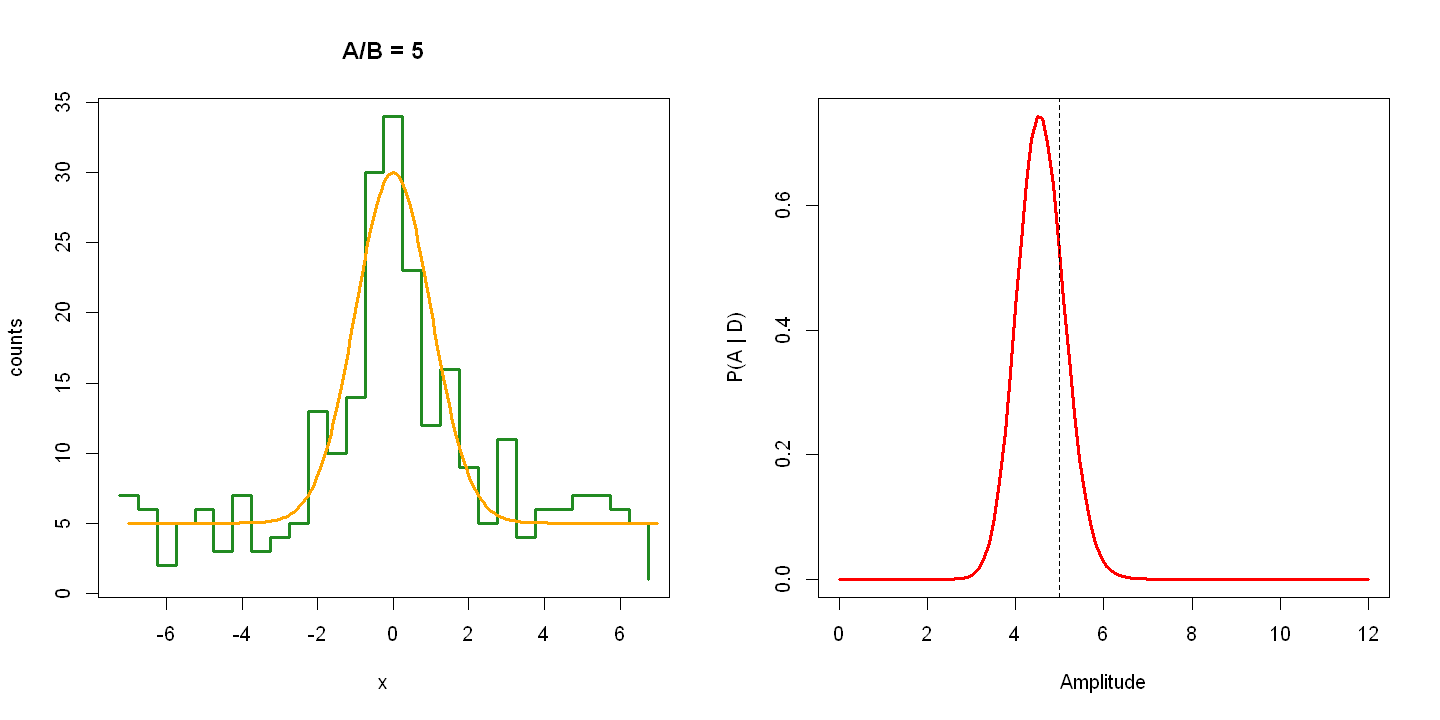

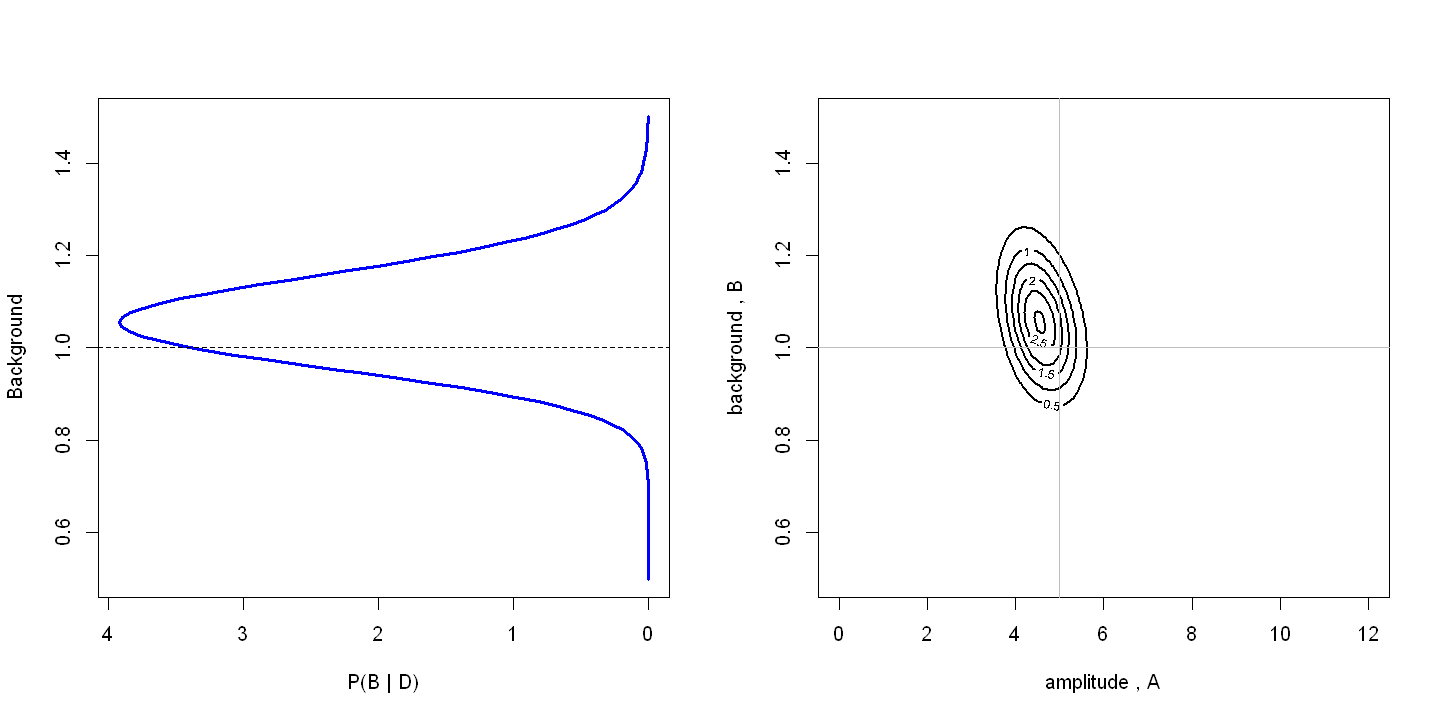

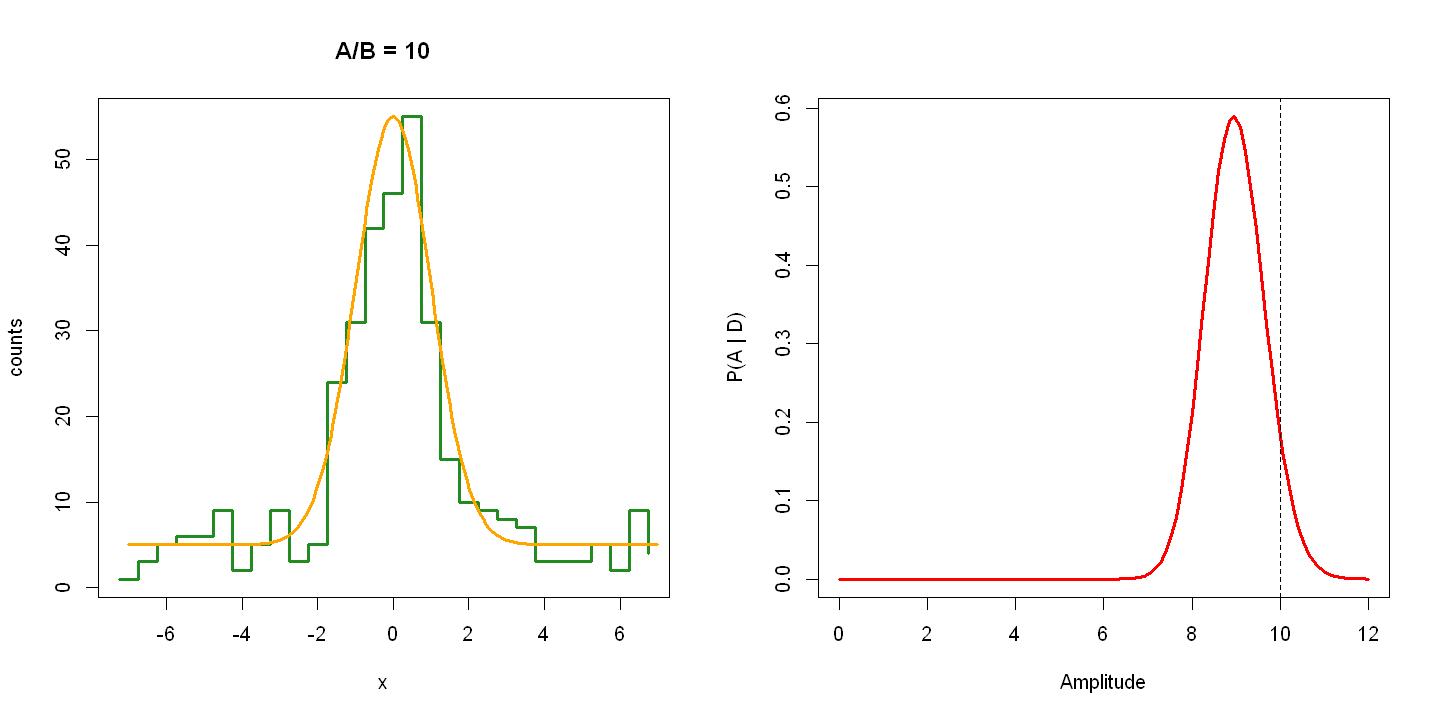

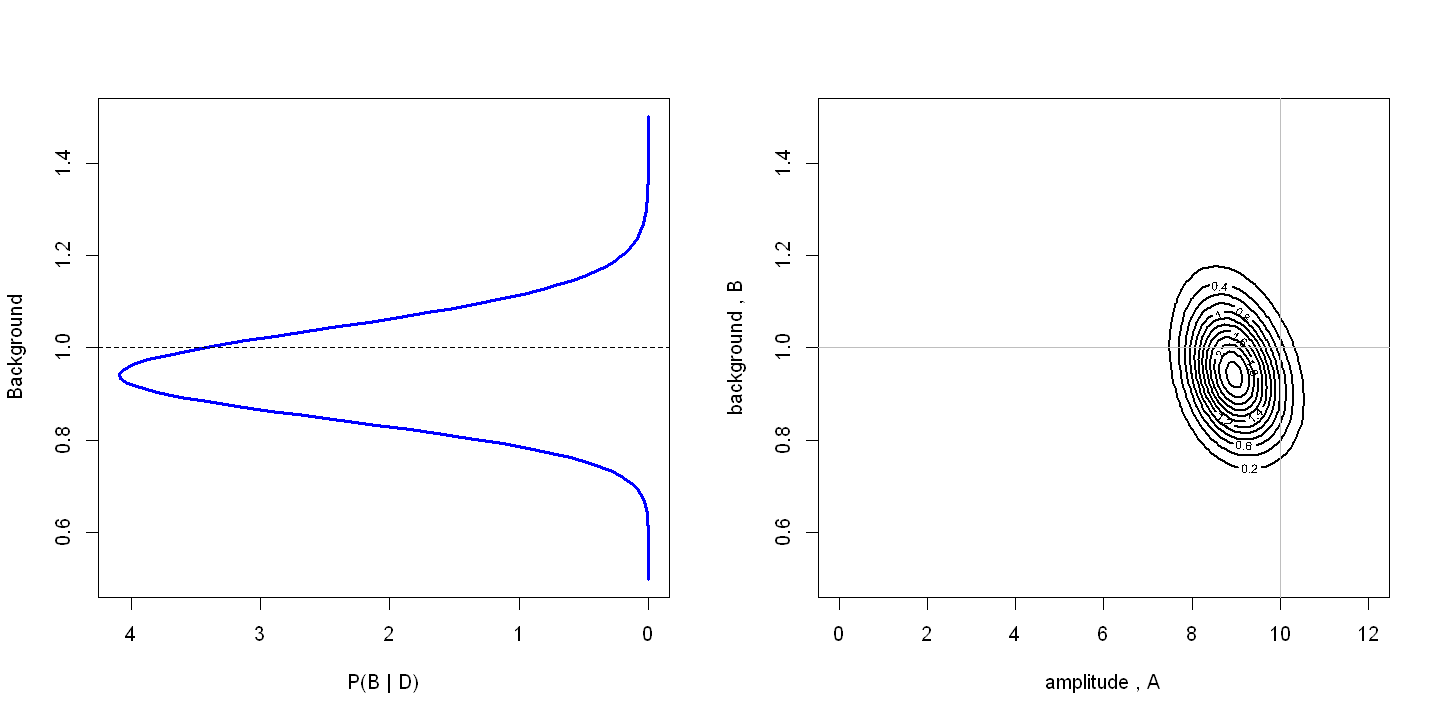

In [28]:
fig(12, 6)
par(mfrow = c(1, 2))

M_a <- c()
M_b <- c()
SD_a <- c()
SD_b <- c()

for (A in A.true)
{
    xdat <- seq(from=-7*w, to=7*w, by=0.5*w)
    s.true <- signal(xdat , A , B.true , x0, w, Dt)
    ddat <- rpois(length(s.true), s.true)
    xplot <- seq(from=min(xdat), to=max(xdat), by=0.05*w)
    splot <- signal(xplot , A , B.true , x0, w, Dt)
    xdat.off <- xdat - 0.25*w
    plot(xdat.off, ddat , type='s', col='forestgreen', lwd=3, xlab="x", ylab="counts", main = paste('A/B =', as.character(A/B.true)))
    lines(xplot , splot, lwd = 3, col = 'orange')
    

    Norm <- adaptIntegrate(posterior, lowerLimit = c(a_min, b_min), upperLimit = c(a_max, b_max), d = ddat, x = xdat, x0 = x0, w = w, t = Dt)$integral
    PP <- apply(p_list, 1, posterior, d = ddat, x = xdat, x0 = x0, w = w, t = Dt)/Norm
    PP <- matrix(PP, nrow = length(a_list))
    
    p_a_D <- apply(PP, 1, sum)
    p_a_D <- p_a_D/(delta_a*sum(p_a_D))
    p_b_D <- apply(PP, 2, sum)
    p_b_D <- p_b_D/(delta_b*sum(p_b_D))
    
    mean_a <- delta_a * sum(a_list * p_a_D)
    M_a <- append(M_a, mean_a)
    mean_b <- delta_b * sum(b_list * p_b_D)
    M_b <- append(M_b, mean_b)
    sd_a <- sqrt(delta_a * sum((a_list-mean_a)^2 * p_a_D))
    SD_a <- append(SD_a, sd_a)
    sd_b <- sqrt(delta_b * sum((b_list-mean_b)^2 * p_b_D))
    SD_b <- append(SD_b, sd_b)
    
    plot(a_list, p_a_D, xlab= "Amplitude", ylab="P(A | D)", type="l", lwd=2.5, col = 'red')
    abline(v = A, lty = 2)
    plot(p_b_D, b_list, ylab= "Background", xlim = rev(range(p_b_D)), xlab="P(B | D)", type="l", lwd=2.5, col = 'blue')
    abline(h = B.true, lty = 2)
    
    contour(a_list, b_list, PP, lwd = 2, xlab="amplitude , A", ylab="background , B") 
    abline(v=A,h=1,col="grey")
}

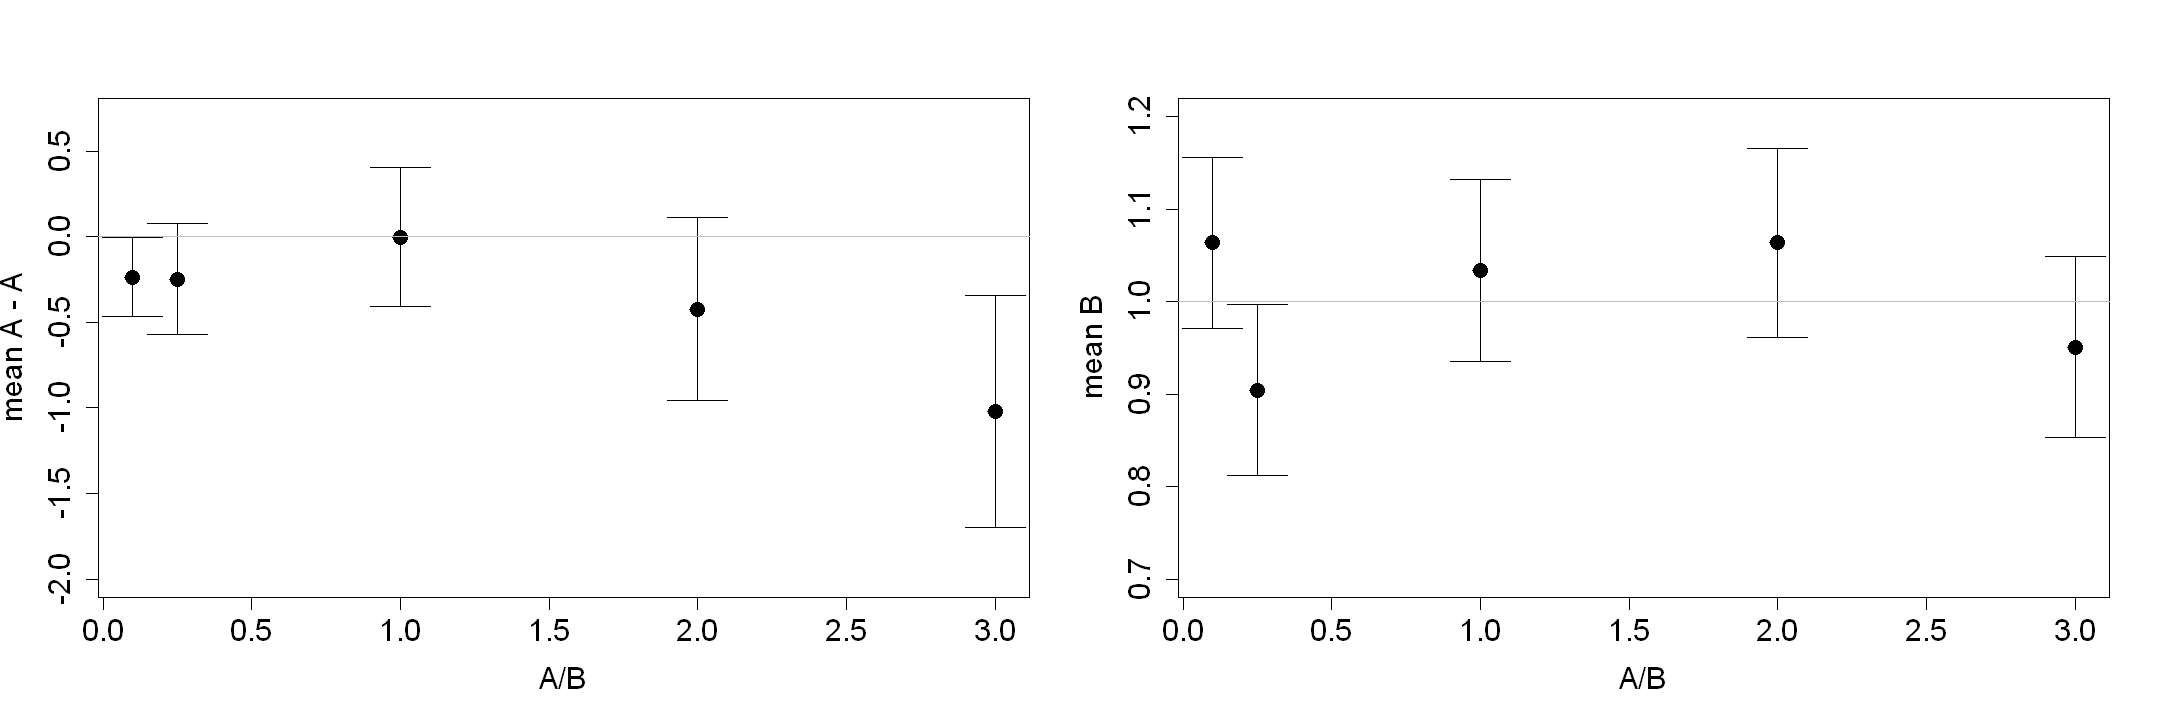

In [29]:
fig(18, 6)
par(mfrow = c(1, 2))
plot(ws, M_a-A.true, pch = 19, lwd = 7, cex.axis = 1.5, cex.lab = 1.5, xlab = 'A/B', ylab = 'mean A - A', ylim = c(-2, 0.7))
arrows(ws, M_a-A.true-SD_a, ws, M_a-A.true+SD_a, angle = 90, code = 3)
abline(h = 0, col = 'grey')
plot(ws, M_b, pch = 19, lwd = 7, cex.axis = 1.5, cex.lab = 1.5, xlab = 'A/B', ylab = 'mean B', ylim = c(0.7, 1.2))
arrows(ws, M_b-SD_b, ws, M_b+SD_b, angle = 90, code = 3)
abline(h = B.true, col = 'grey')

Also in this case is difficult to understand the effect of changing the ratio in parameter recognition performance. 